# Assignment 6: Apply NB

<ol>
    <li><strong>Apply Multinomial NB on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li></li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
        </ul>
    </li>
    <li>
fine the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using absolute values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print their corresponding feature names
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [2]:
import pandas
data = pandas.read_csv('preprocessed_data.csv', nrows=50000)

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [3]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

import pandas as pd
import numpy as np
from tqdm import tqdm
from scipy.sparse import hstack
    
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*50)

(22445, 8) (22445,)
(11055, 8) (11055,)
(16500, 8) (16500,)


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [4]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
#     a. Title, that describes your plot, this will be very helpful to the reader
#     b. Legends if needed
#     c. X-axis label
#     d. Y-axis label
 
# Encoding essay with bow

vectorizer_bow = CountVectorizer(min_df=10)
vectorizer_bow.fit(X_train['essay'].values)

X_train_essay_bow = vectorizer_bow.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer_bow.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer_bow.transform(X_test['essay'].values)

print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)

print("="*50)

# Encoding essay with tfidf

vectorizer_tfidf = TfidfVectorizer(min_df=10)
vectorizer_tfidf.fit(X_train['essay'].values)

X_train_essay_tfidf = vectorizer_tfidf.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer_tfidf.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer_tfidf.transform(X_test['essay'].values)

print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)

print("="*50)

(22445, 8817) (22445,)
(11055, 8817) (11055,)
(16500, 8817) (16500,)
(22445, 8817) (22445,)
(11055, 8817) (11055,)
(16500, 8817) (16500,)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [6]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
# Encoding categorical features with bow

vectorizer1 = CountVectorizer()
vectorizer1.fit(X_train['school_state'].values)

X_train_state = vectorizer1.transform(X_train['school_state'].values)
X_cv_state = vectorizer1.transform(X_cv['school_state'].values)
X_test_state = vectorizer1.transform(X_test['school_state'].values)

print(X_train_state.shape, y_train.shape)
print(X_cv_state.shape, y_cv.shape)
print(X_test_state.shape, y_test.shape)

print("="*50)

vectorizer2 = CountVectorizer()
vectorizer2.fit(X_train['teacher_prefix'].values)

X_train_teacher_prefix = vectorizer2.transform(X_train['teacher_prefix'].values)
X_cv_teacher_prefix = vectorizer2.transform(X_cv['teacher_prefix'].values)
X_test_teacher_prefix = vectorizer2.transform(X_test['teacher_prefix'].values)

print(X_train_teacher_prefix.shape, y_train.shape)
print(X_cv_teacher_prefix.shape, y_cv.shape)
print(X_test_teacher_prefix.shape, y_test.shape)

print("="*50)

vectorizer3 = CountVectorizer()
vectorizer3.fit(X_train['project_grade_category'].values)

X_train_project_grade = vectorizer3.transform(X_train['project_grade_category'].values)
X_cv_project_grade = vectorizer3.transform(X_cv['project_grade_category'].values)
X_test_project_grade = vectorizer3.transform(X_test['project_grade_category'].values)

print(X_train_project_grade.shape, y_train.shape)
print(X_cv_project_grade.shape, y_cv.shape)
print(X_test_project_grade.shape, y_test.shape)

print("="*50)

vectorizer4 = CountVectorizer()
vectorizer4.fit(X_train['clean_categories'].values)

X_train_clean_cat = vectorizer4.transform(X_train['clean_categories'].values)
X_cv_clean_cat = vectorizer4.transform(X_cv['clean_categories'].values)
X_test_clean_cat = vectorizer4.transform(X_test['clean_categories'].values)

print(X_train_clean_cat.shape, y_train.shape)
print(X_cv_clean_cat.shape, y_cv.shape)
print(X_test_clean_cat.shape, y_test.shape)

print("="*50)

vectorizer5 = CountVectorizer()
vectorizer5.fit(X_train['clean_subcategories'].values)

X_train_clean_subcat = vectorizer5.transform(X_train['clean_subcategories'].values)
X_cv_clean_subcat = vectorizer5.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcat = vectorizer5.transform(X_test['clean_subcategories'].values)

print(X_train_clean_subcat.shape, y_train.shape)
print(X_cv_clean_subcat.shape, y_cv.shape)
print(X_test_clean_subcat.shape, y_test.shape)

print("="*100)

# Encoding numberical features

normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_teacher_previously_posted = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_teacher_previously_posted = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_previously_posted = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print(X_train_teacher_previously_posted.shape, y_train.shape)
print(X_cv_teacher_previously_posted.shape, y_cv.shape)
print(X_test_teacher_previously_posted.shape, y_test.shape)

print("="*50)

normalizer1 = Normalizer()
normalizer1.fit(X_train['price'].values.reshape(-1,1))

X_train_price = normalizer1.transform(X_train['price'].values.reshape(-1,1))
X_cv_price = normalizer1.transform(X_cv['price'].values.reshape(-1,1))
X_test_price = normalizer1.transform(X_test['price'].values.reshape(-1,1))

print(X_train_price.shape, y_train.shape)
print(X_cv_price.shape, y_cv.shape)
print(X_test_price.shape, y_test.shape)

print("="*100)


(22445, 51) (22445,)
(11055, 51) (11055,)
(16500, 51) (16500,)
(22445, 5) (22445,)
(11055, 5) (11055,)
(16500, 5) (16500,)
(22445, 4) (22445,)
(11055, 4) (11055,)
(16500, 4) (16500,)
(22445, 9) (22445,)
(11055, 9) (11055,)
(16500, 9) (16500,)
(22445, 30) (22445,)
(11055, 30) (11055,)
(16500, 30) (16500,)
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [7]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
X_train_bow = hstack((X_train_state, X_train_teacher_prefix, X_train_project_grade, X_train_teacher_previously_posted, X_train_clean_cat, X_train_clean_subcat, X_train_price, X_train_essay_bow)).tocsr()

X_test_bow = hstack((X_test_state, X_test_teacher_prefix, X_test_project_grade, X_test_teacher_previously_posted, X_test_clean_cat, X_test_clean_subcat, X_test_price, X_test_essay_bow)).tocsr()

print(X_train_bow.shape)
print(X_test_bow.shape)

print("="*50)

X_train_tfidf = hstack((X_train_state, X_train_teacher_prefix, X_train_project_grade, X_train_teacher_previously_posted, X_train_clean_cat, X_train_clean_subcat, X_train_price, X_train_essay_tfidf)).tocsr()

X_test_tfidf = hstack((X_test_state, X_test_teacher_prefix, X_test_project_grade, X_test_teacher_previously_posted, X_test_clean_cat, X_test_clean_subcat, X_test_price, X_test_essay_tfidf)).tocsr()

print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

print("="*100)


(22445, 8918)
(16500, 8918)
(22445, 8918)
(16500, 8918)


Best score:  0.6957702377589909
Best alpha:  {'alpha': 0.5}


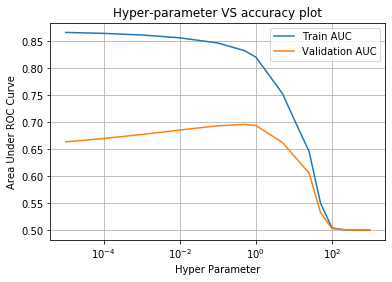

In [10]:
import matplotlib.pyplot as plt

params = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 25, 50, 100, 250, 500, 1000]}

model = GridSearchCV(MultinomialNB(class_prior=[0.5,0.5]), params, cv=10, scoring='roc_auc', return_train_score=True)

model.fit(X_train_bow, y_train)

train_auc= model.cv_results_['mean_train_score']
cv_auc = model.cv_results_['mean_test_score'] 

print('Best score: ',model.best_score_)
print('Best alpha: ',model.best_params_)

plt.plot(params['alpha'], train_auc, label='Train AUC')
plt.plot(params['alpha'], cv_auc, label='Validation AUC')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.xlabel("Hyper Parameter")
plt.ylabel("Area Under ROC Curve")
plt.xscale('log')
plt.grid()
plt.show()


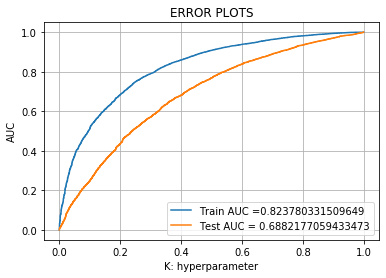

In [11]:
naive_bayes_bow = MultinomialNB(alpha=0.5)

naive_bayes_bow.fit(X_train_bow, y_train)

y_train_pred = naive_bayes_bow.predict_proba(X_train_bow)[:,1]
y_test_pred = naive_bayes_bow.predict_proba(X_test_bow)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC =" + str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC = " + str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [12]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [13]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.5623743705337874 for threshold 0.781
Train confusion matrix
[[ 2687   908]
 [ 4667 14183]]
Test confusion matrix
[[ 1462  1180]
 [ 3800 10058]]


In [25]:
bow_features = []

for i in vectorizer_bow.get_feature_names():
    bow_features.append(i)
    
for i in vectorizer1.get_feature_names():
    bow_features.append(i)
    
for i in vectorizer2.get_feature_names():
    bow_features.append(i)
    
for i in vectorizer3.get_feature_names():
    bow_features.append(i)
    
for i in vectorizer4.get_feature_names():
    bow_features.append(i)
    
for i in vectorizer5.get_feature_names():
    bow_features.append(i)
    
bow_features.append("price")
bow_features.append("teacher_number_of_previously_posted_projects")

# https://stackoverflow.com/questions/50526898/how-to-get-feature-importance-in-naive-bayes
top_10_pos_features = naive_bayes_bow.feature_log_prob_[1, :].argsort()
top_10_neg_features = naive_bayes_bow.feature_log_prob_[0, :].argsort()

top_10_pos_features = top_10_pos_features[::-1]
top_10_neg_features = top_10_neg_features[::-1]   

print('Top 20 features:')
print(np.take(bow_features, top_10_pos_features[:10]))
print(np.take(bow_features, top_10_neg_features[:10]))

Top 20 features:
['surpass' 'sent' 'nightly' 'listeners' 'combine' 'tired' 'oh' 'tone'
 'list' 'hopefully']
['surpass' 'sent' 'listeners' 'nightly' 'combine' 'oh' 'list' 'hopefully'
 'tone' 'tired']


Best score:  0.6649140971547041
Best alpha:  {'alpha': 0.1}


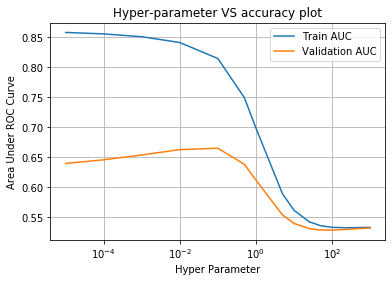

In [26]:
params1 = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 25, 50, 100, 250, 500, 1000]}

model1 = GridSearchCV(MultinomialNB( class_prior = [0.5, 0.5]), params1, cv=10, scoring='roc_auc', return_train_score=True)

model1.fit(X_train_tfidf, y_train)

train_auc1= model1.cv_results_['mean_train_score']
cv_auc1 = model1.cv_results_['mean_test_score'] 

print('Best score: ',model1.best_score_)
print('Best alpha: ',model1.best_params_)

plt.plot(params1['alpha'],train_auc1, label='Train AUC')
plt.plot(params1['alpha'],cv_auc1, label='Validation AUC')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.xlabel("Hyper Parameter")
plt.ylabel("Area Under ROC Curve")
plt.xscale('log')
plt.grid()
plt.show()

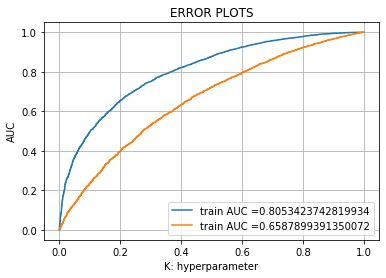

In [27]:
naive_bayes_tfidf = MultinomialNB(alpha=0.1)

naive_bayes_tfidf.fit(X_train_tfidf, y_train)

y_train_pred1 = naive_bayes_tfidf.predict_proba(X_train_tfidf)[:,1]
y_test_pred1 = naive_bayes_tfidf.predict_proba(X_test_tfidf)[:,1]

train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)

plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="train AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [28]:
best_t1 = find_best_threshold(tr_thresholds1, train_fpr1, train_tpr1)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred1, best_t1)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred1, best_t1)))

the maximum value of tpr*(1-fpr) 0.5319171557903514 for threshold 0.836
Train confusion matrix
[[ 2583  1012]
 [ 4895 13955]]
Test confusion matrix
[[1377 1265]
 [4094 9764]]


In [31]:
tfidf_features = []

for i in vectorizer_tfidf.get_feature_names():
    tfidf_features.append(i)
    
for i in vectorizer1.get_feature_names():
    tfidf_features.append(i)
    
for i in vectorizer2.get_feature_names():
    tfidf_features.append(i)
    
for i in vectorizer3.get_feature_names():
    tfidf_features.append(i)
    
for i in vectorizer4.get_feature_names():
    tfidf_features.append(i)
    
for i in vectorizer5.get_feature_names():
    tfidf_features.append(i)
    
tfidf_features.append("price")
tfidf_features.append("teacher_number_of_previously_posted_projects")

# https://stackoverflow.com/questions/50526898/how-to-get-feature-importance-in-naive-bayes
top_10_pos_features = naive_bayes_tfidf.feature_log_prob_[1, :].argsort()
top_10_neg_features = naive_bayes_tfidf.feature_log_prob_[0, :].argsort()

top_10_pos_features = top_10_pos_features[::-1]
top_10_neg_features = top_10_neg_features[::-1]   

print('Top 20 features:')
print(np.take(tfidf_features, top_10_pos_features[:10]))
print(np.take(tfidf_features, top_10_neg_features[:10]))

Top 20 features:
['58' '300' '26' '34' '30' '35' '27' '29' '4k' '50']
['58' '300' '26' '34' '30' '35' '27' '29' '4k' '50']


<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [32]:
from prettytable import PrettyTable

pt = PrettyTable()

pt.field_names = ["Vectorizer", "Model", "Hyper Parameter", "AUC"]

pt.add_row(["BOW", "Naive Bayes", model.best_params_['alpha'], model.best_score_])
pt.add_row(["TFIDF", "Naive Bayes", model1.best_params_['alpha'], model1.best_score_])

print(pt)

+------------+-------------+-----------------+--------------------+
| Vectorizer |    Model    | Hyper Parameter |        AUC         |
+------------+-------------+-----------------+--------------------+
|    BOW     | Naive Bayes |       0.5       | 0.6957702377589909 |
|   TFIDF    | Naive Bayes |       0.1       | 0.6649140971547041 |
+------------+-------------+-----------------+--------------------+
